In [ ]:
import pandas as pd
import numpy as np
import subprocess
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from KeystrokeAnomalyDetector import KeystrokeAnomalyDetector
from typing import Literal
from tqdm import tqdm

%matplotlib inline

In [ ]:
DATASET_PATH = '/content/DSL-StrongPasswordData.csv'

def validate_model(model_name: str, k: int, valid_range, params=None):

    res = {}

    for n in tqdm(valid_range, desc="Testing"):
        eer_all, roc_auc_all, far_all, fpr_all, tpr_all = 0, 0, 0, 0, 0

        if model_name == "KNN":
            param = 'n_neighbors'
            model_params={param: n, 'p': params['p']}
        elif model_name == 'IsolationForest':
            param = 'n_estimators'
            model_params={param: n}
        elif model_name == 'OneClassSVM':
            param = 'nu'
            model_params={param: n}
        elif model_name == 'LOF':
            param = 'n_neighbors'
            model_params={param: n, 'p': params['p']}

        detector = KeystrokeAnomalyDetector(
            model_name=model_name,
            model_params=model_params,
            scaler_enabled=False
        )

        for _ in range(k):
            detector.run_validation(
                extractor_path=DATASET_PATH,
                target_subject='s002',
                n_test_legit=50,
                n_test_anomaly=30,
                n_test_impostors_each=2,
                impostors=impostors
            )
            eer_all += detector.get_report()['eer'] * 100
            roc_auc_all += detector.get_report()['roc_auc']
            far_all += detector.get_report()['far']
            fpr_all = detector.get_report()['fpr']
            tpr_all = detector.get_report()['tpr']

        eer_mean = float(eer_all/k)
        roc_auc_mean = float(roc_auc_all/k)
        far_mean = float(far_all/k)
        # fpr_mean = float(fpr_all/k)
        # tpr_mean = float(tpr_all/k)
        res[str(n)] = [eer_mean, roc_auc_mean, far_mean]

    for key in res:
        print(f'{param} = {key}, EER = {(res[key][0]):.2f}, AUC = {(res[key][1]):.2f}, FAR = {(res[key][2]):.2f}')

    best_key = min(res, key=res.get)
    print(f"The best result: {param} = {best_key}, EER = {(res[best_key][0]):.2f}, AUC = {(res[best_key][1]):.2f}, FAR = {(res[best_key][2]):.2f}")

    return res

In [ ]:
impostors = [f's00{i}' for i in range (3, 10, 1)]
impostors.extend(
    [f's0{i}' for i in range (10, 58, 1)]
)

# 1. KNN

In [ ]:
def validate_KNN(k: int, valid_range, p: int):
    return validate_model(
        model_name='KNN',
        k=k,
        valid_range = valid_range,
        params={'p': p}
    )

In [ ]:
res1 = validate_KNN(k=10, valid_range=range(2, 16), p=1)
res2 = validate_KNN(k=10, valid_range=range(2, 16), p=2)

Testing: 100%|██████████| 14/14 [01:31<00:00,  6.54s/it]


n_neighbors = 2, EER = 15.75, AUC = 0.93, FAR = 0.16
n_neighbors = 3, EER = 14.47, AUC = 0.93, FAR = 0.15
n_neighbors = 4, EER = 15.22, AUC = 0.93, FAR = 0.15
n_neighbors = 5, EER = 14.94, AUC = 0.93, FAR = 0.15
n_neighbors = 6, EER = 15.35, AUC = 0.93, FAR = 0.15
n_neighbors = 7, EER = 15.53, AUC = 0.93, FAR = 0.15
n_neighbors = 8, EER = 17.73, AUC = 0.93, FAR = 0.17
n_neighbors = 9, EER = 17.63, AUC = 0.93, FAR = 0.17
n_neighbors = 10, EER = 17.00, AUC = 0.93, FAR = 0.17
n_neighbors = 11, EER = 16.37, AUC = 0.93, FAR = 0.17
n_neighbors = 12, EER = 16.28, AUC = 0.93, FAR = 0.16
n_neighbors = 13, EER = 16.25, AUC = 0.93, FAR = 0.16
n_neighbors = 14, EER = 15.92, AUC = 0.92, FAR = 0.16
n_neighbors = 15, EER = 16.12, AUC = 0.92, FAR = 0.16
The best result: n_neighbors = 3, EER = 14.47, AUC = 0.93, FAR = 0.15


Testing: 100%|██████████| 14/14 [01:29<00:00,  6.36s/it]

n_neighbors = 2, EER = 15.92, AUC = 0.93, FAR = 0.16
n_neighbors = 3, EER = 14.23, AUC = 0.93, FAR = 0.14
n_neighbors = 4, EER = 15.57, AUC = 0.93, FAR = 0.16
n_neighbors = 5, EER = 15.18, AUC = 0.93, FAR = 0.15
n_neighbors = 6, EER = 15.67, AUC = 0.93, FAR = 0.16
n_neighbors = 7, EER = 15.39, AUC = 0.93, FAR = 0.15
n_neighbors = 8, EER = 17.61, AUC = 0.93, FAR = 0.18
n_neighbors = 9, EER = 17.81, AUC = 0.93, FAR = 0.18
n_neighbors = 10, EER = 16.86, AUC = 0.93, FAR = 0.17
n_neighbors = 11, EER = 16.45, AUC = 0.93, FAR = 0.17
n_neighbors = 12, EER = 16.77, AUC = 0.93, FAR = 0.17
n_neighbors = 13, EER = 16.15, AUC = 0.93, FAR = 0.16
n_neighbors = 14, EER = 15.92, AUC = 0.92, FAR = 0.16
n_neighbors = 15, EER = 15.73, AUC = 0.92, FAR = 0.15
The best result: n_neighbors = 3, EER = 14.23, AUC = 0.93, FAR = 0.14


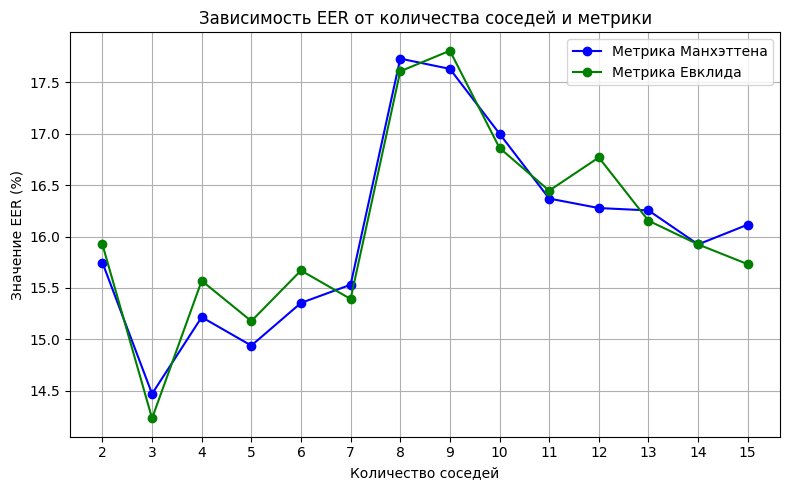

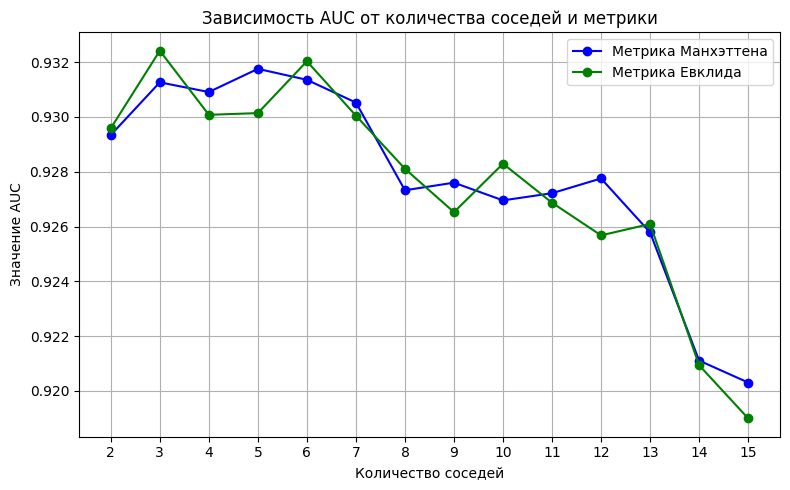

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(list(res1.keys()), [v[0] for v in res1.values()], marker='o', linestyle='-', color='blue', label='Метрика Манхэттена')
plt.plot(list(res2.keys()), [v[0] for v in res2.values()], marker='o', linestyle='-', color='green', label='Метрика Евклида')

plt.xlabel("Количество соседей")
plt.ylabel('Значение EER (%)')

plt.title(f'Зависимость EER от количества соседей и метрики')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(list(res1.keys()), [v[1] for v in res1.values()], marker='o', linestyle='-', color='blue', label='Метрика Манхэттена')
plt.plot(list(res2.keys()), [v[1] for v in res2.values()], marker='o', linestyle='-', color='green', label='Метрика Евклида')

plt.xlabel("Количество соседей")
plt.ylabel('Значение AUC')

plt.title(f'Зависимость AUC от количества соседей и метрики')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Isolation Forest

In [ ]:
def validate_Isolation_Forest(k: int, valid_range, max_features: float):
    return validate_model(
        model_name='IsolationForest',
        k=10,
        valid_range = valid_range,
        params={'max_features': max_features}
    )

In [ ]:
range_from = 10
range_to = 200
range_step = 10

res1 = validate_Isolation_Forest(k=10, valid_range=range(range_from, range_to, range_step), max_features=0.3)
res2 = validate_Isolation_Forest(k=10, valid_range=range(range_from, range_to, range_step), max_features=0.5)
res3 = validate_Isolation_Forest(k=10, valid_range=range(range_from, range_to, range_step), max_features=0.7)
res4 = validate_Isolation_Forest(k=10, valid_range=range(range_from, range_to, range_step), max_features=0.9)
res5 = validate_Isolation_Forest(k=10, valid_range=range(range_from, range_to, range_step), max_features=1.0)

Testing: 100%|██████████| 19/19 [02:41<00:00,  8.51s/it]


n_neighbors = 10, EER = 28.04, AUC = 0.83, FAR = 0.28
n_neighbors = 20, EER = 21.82, AUC = 0.88, FAR = 0.22
n_neighbors = 30, EER = 19.38, AUC = 0.93, FAR = 0.21
n_neighbors = 40, EER = 16.43, AUC = 0.93, FAR = 0.16
n_neighbors = 50, EER = 17.49, AUC = 0.92, FAR = 0.17
n_neighbors = 60, EER = 16.58, AUC = 0.93, FAR = 0.17
n_neighbors = 70, EER = 18.65, AUC = 0.92, FAR = 0.19
n_neighbors = 80, EER = 17.34, AUC = 0.93, FAR = 0.17
n_neighbors = 90, EER = 14.48, AUC = 0.93, FAR = 0.14
n_neighbors = 100, EER = 16.24, AUC = 0.92, FAR = 0.16
n_neighbors = 110, EER = 16.12, AUC = 0.93, FAR = 0.16
n_neighbors = 120, EER = 15.44, AUC = 0.93, FAR = 0.15
n_neighbors = 130, EER = 16.45, AUC = 0.93, FAR = 0.16
n_neighbors = 140, EER = 18.17, AUC = 0.92, FAR = 0.19
n_neighbors = 150, EER = 17.33, AUC = 0.92, FAR = 0.16
n_neighbors = 160, EER = 17.48, AUC = 0.91, FAR = 0.18
n_neighbors = 170, EER = 18.15, AUC = 0.91, FAR = 0.18
n_neighbors = 180, EER = 15.90, AUC = 0.92, FAR = 0.16
n_neighbors = 190, 

Testing: 100%|██████████| 19/19 [02:55<00:00,  9.22s/it]


n_neighbors = 10, EER = 28.24, AUC = 0.83, FAR = 0.28
n_neighbors = 20, EER = 20.88, AUC = 0.88, FAR = 0.21
n_neighbors = 30, EER = 18.12, AUC = 0.92, FAR = 0.18
n_neighbors = 40, EER = 16.55, AUC = 0.93, FAR = 0.16
n_neighbors = 50, EER = 16.49, AUC = 0.92, FAR = 0.16
n_neighbors = 60, EER = 16.90, AUC = 0.93, FAR = 0.17
n_neighbors = 70, EER = 18.68, AUC = 0.92, FAR = 0.19
n_neighbors = 80, EER = 16.90, AUC = 0.93, FAR = 0.17
n_neighbors = 90, EER = 14.20, AUC = 0.93, FAR = 0.14
n_neighbors = 100, EER = 16.53, AUC = 0.92, FAR = 0.16
n_neighbors = 110, EER = 15.46, AUC = 0.93, FAR = 0.16
n_neighbors = 120, EER = 15.98, AUC = 0.93, FAR = 0.16
n_neighbors = 130, EER = 16.71, AUC = 0.93, FAR = 0.17
n_neighbors = 140, EER = 18.55, AUC = 0.92, FAR = 0.19
n_neighbors = 150, EER = 18.06, AUC = 0.92, FAR = 0.18
n_neighbors = 160, EER = 16.96, AUC = 0.91, FAR = 0.17
n_neighbors = 170, EER = 17.88, AUC = 0.91, FAR = 0.18
n_neighbors = 180, EER = 16.53, AUC = 0.92, FAR = 0.16
n_neighbors = 190, 

Testing: 100%|██████████| 19/19 [03:05<00:00,  9.74s/it]


n_neighbors = 10, EER = 28.00, AUC = 0.84, FAR = 0.28
n_neighbors = 20, EER = 20.76, AUC = 0.88, FAR = 0.21
n_neighbors = 30, EER = 18.81, AUC = 0.93, FAR = 0.20
n_neighbors = 40, EER = 16.19, AUC = 0.93, FAR = 0.16
n_neighbors = 50, EER = 16.15, AUC = 0.92, FAR = 0.16
n_neighbors = 60, EER = 16.63, AUC = 0.93, FAR = 0.16
n_neighbors = 70, EER = 18.72, AUC = 0.92, FAR = 0.19
n_neighbors = 80, EER = 17.33, AUC = 0.93, FAR = 0.17
n_neighbors = 90, EER = 14.69, AUC = 0.93, FAR = 0.14
n_neighbors = 100, EER = 15.95, AUC = 0.92, FAR = 0.16
n_neighbors = 110, EER = 17.03, AUC = 0.93, FAR = 0.17
n_neighbors = 120, EER = 14.61, AUC = 0.93, FAR = 0.15
n_neighbors = 130, EER = 15.65, AUC = 0.93, FAR = 0.15
n_neighbors = 140, EER = 17.82, AUC = 0.93, FAR = 0.18
n_neighbors = 150, EER = 18.14, AUC = 0.92, FAR = 0.18
n_neighbors = 160, EER = 17.08, AUC = 0.91, FAR = 0.17
n_neighbors = 170, EER = 18.41, AUC = 0.91, FAR = 0.19
n_neighbors = 180, EER = 16.59, AUC = 0.91, FAR = 0.16
n_neighbors = 190, 

Testing: 100%|██████████| 19/19 [02:49<00:00,  8.95s/it]


n_neighbors = 10, EER = 27.39, AUC = 0.84, FAR = 0.27
n_neighbors = 20, EER = 21.30, AUC = 0.88, FAR = 0.21
n_neighbors = 30, EER = 18.85, AUC = 0.92, FAR = 0.20
n_neighbors = 40, EER = 16.81, AUC = 0.93, FAR = 0.17
n_neighbors = 50, EER = 17.00, AUC = 0.92, FAR = 0.17
n_neighbors = 60, EER = 16.72, AUC = 0.93, FAR = 0.17
n_neighbors = 70, EER = 18.00, AUC = 0.92, FAR = 0.18
n_neighbors = 80, EER = 17.28, AUC = 0.93, FAR = 0.17
n_neighbors = 90, EER = 14.98, AUC = 0.94, FAR = 0.15
n_neighbors = 100, EER = 15.90, AUC = 0.92, FAR = 0.16
n_neighbors = 110, EER = 16.47, AUC = 0.93, FAR = 0.17
n_neighbors = 120, EER = 15.96, AUC = 0.93, FAR = 0.16
n_neighbors = 130, EER = 16.55, AUC = 0.93, FAR = 0.16
n_neighbors = 140, EER = 18.42, AUC = 0.92, FAR = 0.19
n_neighbors = 150, EER = 18.23, AUC = 0.92, FAR = 0.18
n_neighbors = 160, EER = 17.14, AUC = 0.92, FAR = 0.17
n_neighbors = 170, EER = 17.77, AUC = 0.91, FAR = 0.18
n_neighbors = 180, EER = 16.22, AUC = 0.92, FAR = 0.16
n_neighbors = 190, 

Testing: 100%|██████████| 19/19 [02:46<00:00,  8.76s/it]

n_neighbors = 10, EER = 28.04, AUC = 0.83, FAR = 0.28
n_neighbors = 20, EER = 21.80, AUC = 0.88, FAR = 0.22
n_neighbors = 30, EER = 19.62, AUC = 0.92, FAR = 0.21
n_neighbors = 40, EER = 16.82, AUC = 0.93, FAR = 0.17
n_neighbors = 50, EER = 16.92, AUC = 0.92, FAR = 0.17
n_neighbors = 60, EER = 17.00, AUC = 0.93, FAR = 0.17
n_neighbors = 70, EER = 18.10, AUC = 0.92, FAR = 0.18
n_neighbors = 80, EER = 17.57, AUC = 0.92, FAR = 0.18
n_neighbors = 90, EER = 14.59, AUC = 0.93, FAR = 0.14
n_neighbors = 100, EER = 16.14, AUC = 0.93, FAR = 0.16
n_neighbors = 110, EER = 16.25, AUC = 0.93, FAR = 0.16
n_neighbors = 120, EER = 16.18, AUC = 0.93, FAR = 0.16
n_neighbors = 130, EER = 16.55, AUC = 0.93, FAR = 0.16
n_neighbors = 140, EER = 18.86, AUC = 0.93, FAR = 0.20
n_neighbors = 150, EER = 17.19, AUC = 0.91, FAR = 0.16
n_neighbors = 160, EER = 17.25, AUC = 0.92, FAR = 0.17
n_neighbors = 170, EER = 18.29, AUC = 0.91, FAR = 0.18
n_neighbors = 180, EER = 16.72, AUC = 0.91, FAR = 0.17
n_neighbors = 190, 

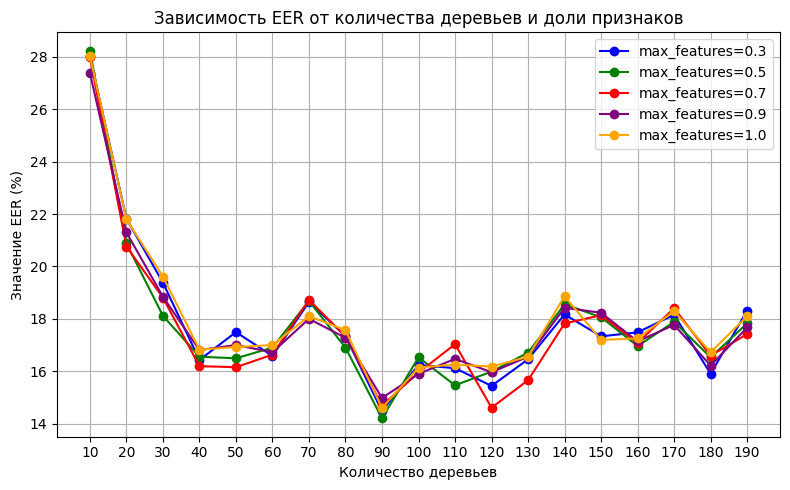

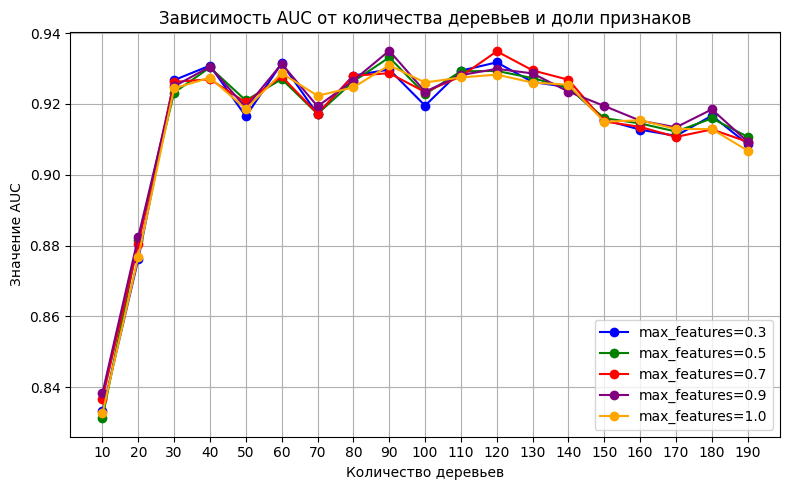

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(list(res1.keys()), [v[0] for v in res1.values()], marker='o', linestyle='-', color='blue', label=f'max_features={0.3}')
plt.plot(list(res2.keys()), [v[0] for v in res2.values()], marker='o', linestyle='-', color='green', label=f'max_features={0.5}')
plt.plot(list(res3.keys()), [v[0] for v in res3.values()], marker='o', linestyle='-', color='red', label=f'max_features={0.7}')
plt.plot(list(res4.keys()), [v[0] for v in res4.values()], marker='o', linestyle='-', color='purple', label=f'max_features={0.9}')
plt.plot(list(res5.keys()), [v[0] for v in res5.values()], marker='o', linestyle='-', color='orange', label=f'max_features={1.0}')

plt.xlabel("Количество деревьев")
plt.ylabel('Значение EER (%)')

plt.title(f'Зависимость EER от количества деревьев и доли признаков')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(list(res1.keys()), [v[1] for v in res1.values()], marker='o', linestyle='-', color='blue', label=f'max_features={0.3}')
plt.plot(list(res2.keys()), [v[1] for v in res2.values()], marker='o', linestyle='-', color='green', label=f'max_features={0.5}')
plt.plot(list(res3.keys()), [v[1] for v in res3.values()], marker='o', linestyle='-', color='red', label=f'max_features={0.7}')
plt.plot(list(res4.keys()), [v[1] for v in res4.values()], marker='o', linestyle='-', color='purple', label=f'max_features={0.9}')
plt.plot(list(res5.keys()), [v[1] for v in res5.values()], marker='o', linestyle='-', color='orange', label=f'max_features={1.0}')

plt.xlabel("Количество деревьев")
plt.ylabel('Значение AUC')

plt.title(f'Зависимость AUC от количества деревьев и доли признаков')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. One Class SVM

In [ ]:
def validate_SVM(k: int, valid_range):
    return validate_model(
        model_name='OneClassSVM',
        k=10,
        valid_range = valid_range
        # params={'max_features': max_features}
    )

In [ ]:
res1 = validate_SVM(k=10, valid_range=[0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6])

Testing: 100%|██████████| 13/13 [01:22<00:00,  6.38s/it]

nu = 0.01, EER = 29.85, AUC = 0.81, FAR = 0.28
nu = 0.05, EER = 29.65, AUC = 0.80, FAR = 0.29
nu = 0.1, EER = 28.23, AUC = 0.81, FAR = 0.28
nu = 0.15, EER = 29.65, AUC = 0.81, FAR = 0.29
nu = 0.2, EER = 27.23, AUC = 0.80, FAR = 0.28
nu = 0.25, EER = 28.12, AUC = 0.81, FAR = 0.28
nu = 0.3, EER = 23.54, AUC = 0.83, FAR = 0.23
nu = 0.35, EER = 20.77, AUC = 0.84, FAR = 0.22
nu = 0.4, EER = 20.81, AUC = 0.84, FAR = 0.22
nu = 0.45, EER = 21.01, AUC = 0.85, FAR = 0.22
nu = 0.5, EER = 21.85, AUC = 0.85, FAR = 0.22
nu = 0.55, EER = 21.88, AUC = 0.85, FAR = 0.22
nu = 0.6, EER = 21.85, AUC = 0.86, FAR = 0.22
The best result: nu = 0.35, EER = 20.77, AUC = 0.84, FAR = 0.22


<ipython-input-47-2514825586>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


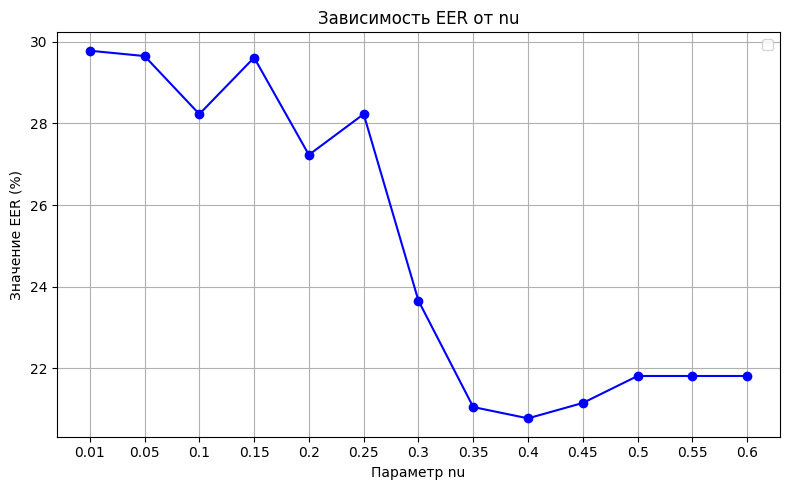

<ipython-input-47-2514825586>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


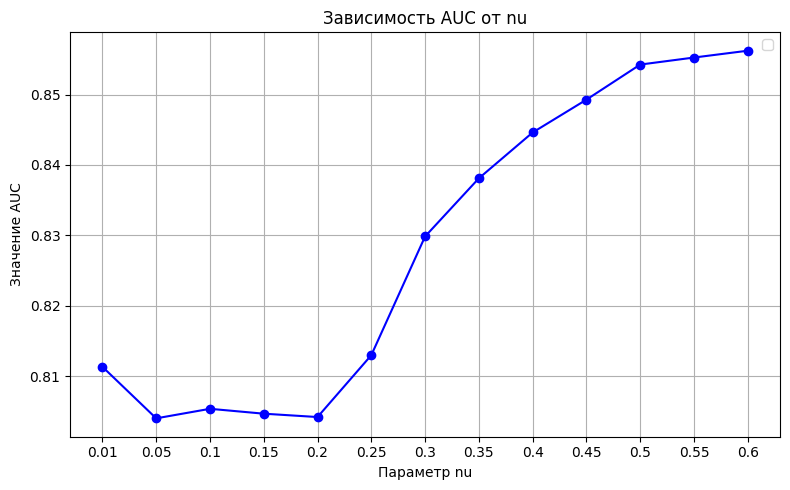

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(list(res1.keys()), [v[0] for v in res1.values()], marker='o', linestyle='-', color='blue')

plt.xlabel("Параметр nu")
plt.ylabel('Значение EER (%)')

plt.title(f'Зависимость EER от nu')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(list(res1.keys()), [v[1] for v in res1.values()], marker='o', linestyle='-', color='blue')

plt.xlabel("Параметр nu")
plt.ylabel('Значение AUC')

plt.title(f'Зависимость AUC от nu')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. LOF

In [ ]:
def validate_LOF(k: int, valid_range, p):
    return validate_model(
        model_name='LOF',
        k=k,
        valid_range = valid_range,
        params={'p': p}
    )

In [ ]:
res1 = validate_LOF(k=10, valid_range=range(2, 16, 1), p=1)
res2 = validate_LOF(k=10, valid_range=range(2, 16, 1), p=2)

Testing: 100%|██████████| 14/14 [01:29<00:00,  6.40s/it]


n_neighbors = 2, EER = 17.72, AUC = 0.91, FAR = 0.18
n_neighbors = 3, EER = 15.21, AUC = 0.93, FAR = 0.16
n_neighbors = 4, EER = 15.75, AUC = 0.92, FAR = 0.16
n_neighbors = 5, EER = 13.81, AUC = 0.92, FAR = 0.15
n_neighbors = 6, EER = 14.75, AUC = 0.93, FAR = 0.15
n_neighbors = 7, EER = 15.96, AUC = 0.93, FAR = 0.16
n_neighbors = 8, EER = 16.62, AUC = 0.93, FAR = 0.17
n_neighbors = 9, EER = 16.55, AUC = 0.92, FAR = 0.17
n_neighbors = 10, EER = 17.16, AUC = 0.92, FAR = 0.17
n_neighbors = 11, EER = 16.92, AUC = 0.91, FAR = 0.17
n_neighbors = 12, EER = 16.37, AUC = 0.90, FAR = 0.17
n_neighbors = 13, EER = 19.78, AUC = 0.89, FAR = 0.18
n_neighbors = 14, EER = 15.22, AUC = 0.86, FAR = 0.19
n_neighbors = 15, EER = 16.12, AUC = 0.86, FAR = 0.19
The best result: n_neighbors = 5, EER = 13.81, AUC = 0.92, FAR = 0.15


Testing: 100%|██████████| 14/14 [01:31<00:00,  6.57s/it]

n_neighbors = 2, EER = 19.96, AUC = 0.88, FAR = 0.20
n_neighbors = 3, EER = 17.62, AUC = 0.89, FAR = 0.17
n_neighbors = 4, EER = 17.56, AUC = 0.89, FAR = 0.18
n_neighbors = 5, EER = 14.28, AUC = 0.89, FAR = 0.16
n_neighbors = 6, EER = 15.16, AUC = 0.89, FAR = 0.16
n_neighbors = 7, EER = 16.33, AUC = 0.88, FAR = 0.16
n_neighbors = 8, EER = 17.62, AUC = 0.88, FAR = 0.17
n_neighbors = 9, EER = 16.58, AUC = 0.87, FAR = 0.17
n_neighbors = 10, EER = 18.08, AUC = 0.87, FAR = 0.18
n_neighbors = 11, EER = 19.21, AUC = 0.87, FAR = 0.19
n_neighbors = 12, EER = 18.65, AUC = 0.86, FAR = 0.19
n_neighbors = 13, EER = 20.04, AUC = 0.85, FAR = 0.20
n_neighbors = 14, EER = 30.52, AUC = 0.79, FAR = 0.31
n_neighbors = 15, EER = 30.38, AUC = 0.79, FAR = 0.31
The best result: n_neighbors = 5, EER = 14.28, AUC = 0.89, FAR = 0.16


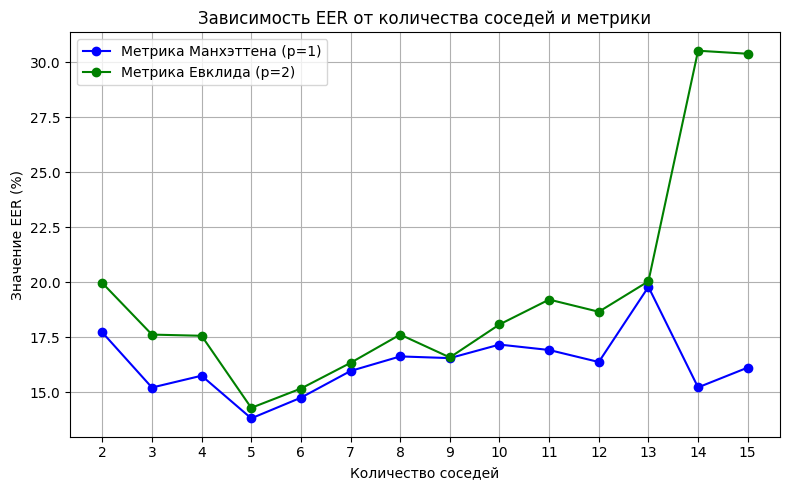

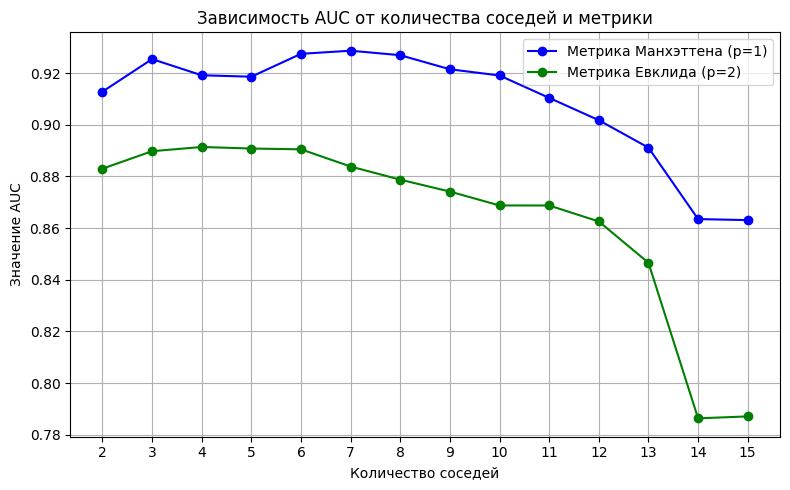

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(list(res1.keys()), [v[0] for v in res1.values()], marker='o', linestyle='-', color='blue', label='Метрика Манхэттена (p=1)')
plt.plot(list(res2.keys()), [v[0] for v in res2.values()], marker='o', linestyle='-', color='green', label='Метрика Евклида (p=2)')

plt.xlabel("Количество соседей")
plt.ylabel('Значение EER (%)')

plt.title(f'Зависимость EER от количества соседей и метрики')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(list(res1.keys()), [v[1] for v in res1.values()], marker='o', linestyle='-', color='blue', label='Метрика Манхэттена (p=1)')
plt.plot(list(res2.keys()), [v[1] for v in res2.values()], marker='o', linestyle='-', color='green', label='Метрика Евклида (p=2)')


plt.xlabel("Количество соседей")
plt.ylabel('Значение AUC')

plt.title(f'Зависимость AUC от количества соседей и метрики')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()